In [482]:
import pandas as pd

In [483]:
data = pd.read_excel('service-data.xlsx',skipinitialspace=True)
data.head()

,Invoice Date,Job Card Date,Business Partner Name,Vehicle No.,Vehicle Model,Current KM Reading,INVOICE LINE TEXT
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,COOLANT OIL


In [484]:
type(data.iloc[1,1])

pandas._libs.tslibs.timestamps.Timestamp

In [485]:
# plt.plot(data.iloc[:,-1])

In [486]:
data['INVOICE LINE TEXT'].count().sum()

# data['Invoice Date'].dt.year

28449

In [503]:
forecastOne = data[['Job Card Date','INVOICE LINE TEXT']]

In [506]:
forecastOne = forecastOne.sort_values('Job Card Date')

In [507]:
forecastOne.head()

,Job Card Date,INVOICE LINE TEXT
0,2017-05-30,ENGINE OIL
23,2017-05-31,VALVE GRAINDING
24,2017-05-31,DISC PAD
25,2017-05-31,LOADING GEAR
26,2017-05-31,PACKING KIT


In [508]:
column_name = ['Date','Stock']
forecastOne.columns = column_name

In [509]:
# forecastOne.head()

In [510]:
forecastOne.loc[forecastOne.Stock == 'POLISH', 'Stock'] = 1
forecastOne.loc[forecastOne.Stock != 1, 'Stock'] = 0

In [511]:
# forecastOne.set_index('Date', inplace = True)
# forecastOne.head()
# forecastOne["Date"] = forecastOne['Date'].astype(str)
# forecastOne.Date = forecastOne['Date'].apply(lambda x: datetime.strptime(x, '%Y%m'))

In [512]:
# forecastOne.head(60)
# forecastOne.loc[forecastOne.Stock == 1].shape

In [513]:
# forecastOne= forecastOne.sort_index()
forecastOne = forecastOne[:-3]

In [514]:
# plt.plot(forecastOne.iloc[1:10,0], forecastOne.iloc[1:10,1])
# forecastOne.head()

In [515]:
year = 2017
month = 5
tempYear = 0
tempMonth = 0
stockCount = 0
dateColumn = []
stockColumn = []
for i, j in forecastOne.iterrows():
    tempYear = j.Date.year
    tempMonth = j.Date.month
    
    
    if(tempYear == year and tempMonth == month):
        stockCount += j.Stock
    else:
        dateColumn.append(str(year)+"-"+str(month)+"-1")
        stockColumn.append(stockCount)
        stockCount = 0
        year = tempYear
        month = tempMonth
        stockCount += j.Stock
print(stockColumn)

[1, 65, 67, 52, 50, 46, 66, 52, 40, 49, 66, 71, 55, 46, 51, 60, 87, 97, 97, 114]


In [516]:
print(dateColumn)

['2017-5-1', '2017-6-1', '2017-7-1', '2017-8-1', '2017-9-1', '2017-10-1', '2017-11-1', '2017-12-1', '2018-1-1', '2018-2-1', '2018-3-1', '2018-4-1', '2018-5-1', '2018-6-1', '2018-7-1', '2018-8-1', '2018-9-1', '2018-10-1', '2018-11-1', '2018-12-1']


In [517]:
final_dict = {'Date':dateColumn,'Stock':stockColumn}

In [518]:
from pandas import datetime
def parser(x):
    return datetime.strptime(x,'%Y-%m-%d')
engineOil = pd.DataFrame(final_dict)
engineOil.Date = engineOil.Date.apply(lambda d: datetime.strptime(d, "%Y-%m-%d"))
# engineOil.index = engineOil.Date
engineOil.set_index('Date', inplace = True)
engineOil.head()

,Stock
Date,
2017-05-01,1
2017-06-01,65
2017-07-01,67
2017-08-01,52
2017-09-01,50


(array([736450., 736511., 736573., 736634., 736695., 736754., 736815.,
        736876., 736938., 736999.]), <a list of 10 Text xticklabel objects>)

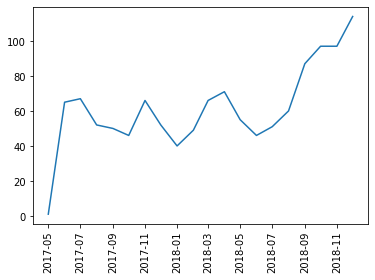

In [519]:
# forecastOne.head()
import matplotlib.pyplot as plt
plt.plot(engineOil)
plt.xticks(rotation = 90)

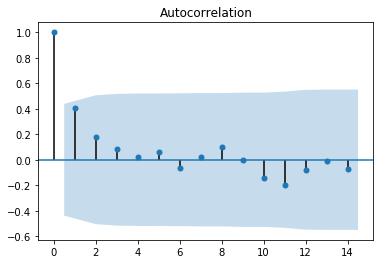

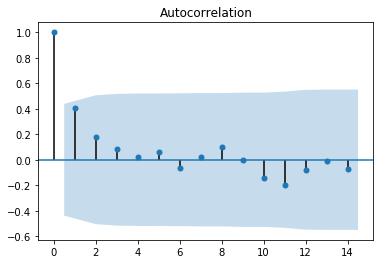

In [520]:
engineOil_diff = engineOil.diff(periods=1)
engineOil_diff = engineOil_diff[1:]
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(engineOil)

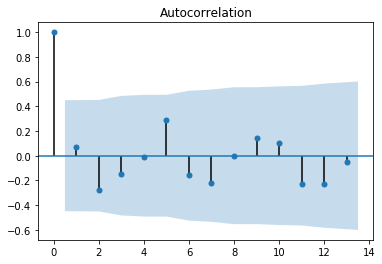

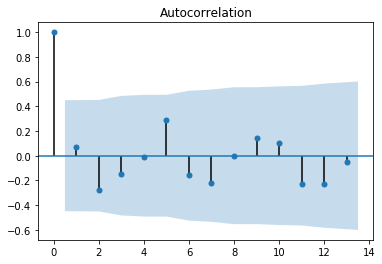

In [521]:
plot_acf(engineOil_diff)

In [547]:
X = engineOil.values
print(X.shape)
from sklearn.model_selection import train_test_split
train = X[0:16]
test = X[16:]
# print(test)
# train, test = train_test_split(X,test_size = 0.2)
# print(train)
print(train.shape, test.shape)

(20, 1)
(16, 1) (4, 1)


In [548]:
from statsmodels.tsa.arima_model import ARIMA

In [549]:
def findPDQ():
    p=0
    d=0
    q=0
    min_value_aic = float("inf")
    for i in range(0,5):
        for j in range(0,5):
            for k in range(0,5):
                try:
                    model_arima = ARIMA(train,order = (i,j,k))
                    model_arima_fit = model_arima.fit()
                    aic = model_arima_fit.aic
                    if aic<min_value_aic:
                        min_value_aic = aic
                        p=i
                        d=j
                        q=k
                except:
                    continue
    return [p,d,q]

In [550]:
pdq = findPDQ();

/home/skdie/anaconda3/envs/datamites/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/skdie/anaconda3/envs/datamites/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/skdie/anaconda3/envs/datamites/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/skdie/anaconda3/envs/datamites/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/skdie/anaconda3/envs/datamites/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverti

In [567]:
print(pdq)
# model_arima = ARIMA(train,order = (pdq[0], pdq[1], pdq[2]))

model_arima = ARIMA(train,order = (0, 2, 3))
model_arima_fit = model_arima.fit()
aic = model_arima_fit.aic
print(aic)
predictions = []

[0, 2, 3]
130.389008945213


/home/skdie/anaconda3/envs/datamites/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [570]:
predictions = model_arima_fit.forecast(steps = 4)[1]

In [571]:
print(predictions,test)

[13.54014593 19.49415242 19.54803798 19.6965228 ] [[ 87]
 [ 97]
 [ 97]
 [114]]


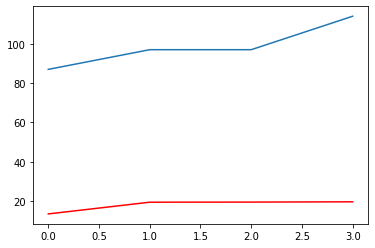

In [572]:
plt.plot(test)
plt.plot(predictions, color = 'red')


In [364]:
type(forecastOne['Date'])

pandas.core.series.Series

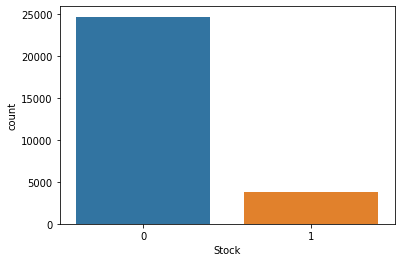

In [232]:
# forecastOne.head()
import seaborn as sn
sn.countplot(forecastOne.Stock)

In [233]:
# from sklearn.preprocessing import LabelEncoder

In [234]:
columnNames = ['Date','Stock']

In [235]:
forecastOne.columns = columnNames

In [236]:
forecastOne.head()

,Date,Stock
0,2017-05-30,1
1,2017-06-02,1
2,2017-06-02,0
3,2017-06-02,0
4,2017-06-02,0


In [240]:
# import seaborn as sn
# sn.countplot(forecastOne[forecastOne.Stock=='ENGINE OIL'])

In [241]:
forecastOne['Date'] = parser(forecastOne['Date'])

TypeError: strptime() argument 1 must be str, not Series

In [238]:
import matplotlib.pyplot as plt
plt.plot(forecastOne[1:5]);


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fde14ad05f0> (for post_execute):


ValueError: view limit minimum -36824.1 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -36824.1 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [135]:
Counter(forecastOne.Stock)

Counter({'ENGINE OIL': 3802,
         'POLISH': 1245,
         'CONSUMABLES': 1595,
         'COOLANT OIL': 70,
         'CHAIN LUBRICATION': 3441,
         '4 WAY SWITCH': 2,
         '3M OIL': 1628,
         'GENERAL SERVICE': 2142,
         'OIL FILTER': 821,
         'INDICATOR': 110,
         'HEAD REST': 56,
         'VALVE GUIDE': 63,
         'TIMMING CHAIN': 78,
         'FOOT REST': 99,
         'LOW BEAM BULB': 12,
         'VALVE GRAINDING': 63,
         'DISC PAD': 575,
         'LOADING GEAR': 53,
         'PACKING KIT': 56,
         'TIMMING CHAIN PAD': 73,
         'TENSIONER': 79,
         'CLUTCH BELL REST': 21,
         'CLUTCH ASSEMBLY': 212,
         'VALVE KIT': 66,
         'SPARK PLUG': 421,
         'ONE WAY CLUTCH': 5,
         'BORE KIT': 53,
         'AIR FILTER': 1715,
         'HEAD RUBBER': 18,
         'CLUTCH CABLE': 263,
         'CRANK SHAFT': 50,
         'BRAKE ADJUSTMENT': 7,
         'BRAKE SHOE': 965,
         'AIR FILTER CHECKUP': 467,
         

In [136]:
labelEncoder= LabelEncoder()

In [137]:
# forecastOne.Stock = labelEncoder.fit_transform(forecastOne.Stock.astype(str))

In [138]:
forecastOne.head()

,Date,Stock
0,2017-05-30,ENGINE OIL
1,2017-06-02,ENGINE OIL
2,2017-06-02,POLISH
3,2017-06-02,CONSUMABLES
4,2017-06-02,COOLANT OIL


In [114]:
from collections import Counter

In [140]:
Counter(forecastOne.Stock)

Counter({'ENGINE OIL': 3802,
         'POLISH': 1245,
         'CONSUMABLES': 1595,
         'COOLANT OIL': 70,
         'CHAIN LUBRICATION': 3441,
         '4 WAY SWITCH': 2,
         '3M OIL': 1628,
         'GENERAL SERVICE': 2142,
         'OIL FILTER': 821,
         'INDICATOR': 110,
         'HEAD REST': 56,
         'VALVE GUIDE': 63,
         'TIMMING CHAIN': 78,
         'FOOT REST': 99,
         'LOW BEAM BULB': 12,
         'VALVE GRAINDING': 63,
         'DISC PAD': 575,
         'LOADING GEAR': 53,
         'PACKING KIT': 56,
         'TIMMING CHAIN PAD': 73,
         'TENSIONER': 79,
         'CLUTCH BELL REST': 21,
         'CLUTCH ASSEMBLY': 212,
         'VALVE KIT': 66,
         'SPARK PLUG': 421,
         'ONE WAY CLUTCH': 5,
         'BORE KIT': 53,
         'AIR FILTER': 1715,
         'HEAD RUBBER': 18,
         'CLUTCH CABLE': 263,
         'CRANK SHAFT': 50,
         'BRAKE ADJUSTMENT': 7,
         'BRAKE SHOE': 965,
         'AIR FILTER CHECKUP': 467,
         